In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# import plotting libraries
import matplotlib.pyplot as plt

1...50: 
      Average, standard deviation, min, max and median of the 
      Attributes 51...60 for the source of the current blog post
      With source we mean the blog on which the post appeared. 
      For example, myblog.blog.org would be the source of 
      the post myblog.blog.org/post_2010_09_10 
      
51:   Total number of comments before basetime

52:   Number of comments in the last 24 hours before the 
      basetime
      
53:   Let T1 denote the datetime 48 hours before basetime,
      Let T2 denote the datetime 24 hours before basetime.
      This attribute is the number of comments in the time period 
      between T1 and T2
      
54:   Number of comments in the first 24 hours after the 
      publication of the blog post, but before basetime
      
55:   The difference of Attribute 52 and Attribute 53

56...60: 
      The same features as the attributes 51...55, but  
      features 56...60 refer to the number of links (trackbacks), 
      while features 51...55 refer to the number of comments.
      
61:   The length of time between the publication of the blog post 
      and basetime
      
62:   The length of the blog post

**63...262: 
      The 200 bag of words features for 200 frequent words of the 
      text of the blog post**
      
263...269: binary indicator features (0 or 1) for the weekday
      (Monday...Sunday) of the basetime
      
270...276: binary indicator features (0 or 1) for the weekday
      (Monday...Sunday) of the date of publication of the blog
      post
      
277:  Number of parent pages: we consider a blog post P as a
      parent of blog post B, if B is a reply (trackback) to 
      blog post P.
      
278...280:  
      Minimum, maximum, average number of comments that the 
      parents received
      
281:  The target: the number of comments in the next 24 hours
      (relative to basetime)

In [195]:
# Load the dataset
data_url = "https://raw.githubusercontent.com/gridflowai/gridflowAI-datasets-icons/master/AI-DATASETS/01-MISC/blogfeedback/blogData_train.csv"
df = pd.read_csv(data_url, header=None)

In [196]:
df.shape

(52397, 281)

In [197]:
df.sample(5)

,0,1,2,3,4,5,6,7,8,9,...,271,272,273,274,275,276,277,278,279,280
7277,7.332609,13.594126,0.0,113.0,2.0,3.143478,7.177945,0.0,76.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
38127,0.121622,0.656623,0.0,4.0,0.0,0.067568,0.474515,0.0,4.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
51853,10.303030,21.490639,0.0,77.0,2.0,3.727273,11.914525,0.0,67.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23587,10.630660,17.882992,1.0,259.0,5.0,4.018276,10.396790,0.0,235.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
11103,9.775768,17.497620,0.0,111.0,2.0,3.490054,10.292661,0.0,104.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [198]:
df.values[:10, 65:190]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [199]:
df.dtypes

0      float64
1      float64
2      float64
3      float64
4      float64
        ...   
276    float64
277    float64
278    float64
279    float64
280    float64
Length: 281, dtype: object

#### check null values

In [200]:
df.isnull().sum()

0      0
1      0
2      0
3      0
4      0
      ..
276    0
277    0
278    0
279    0
280    0
Length: 281, dtype: int64

In [201]:
NAs = pd.concat([df.isnull().sum()], axis=1, keys=['Count of NANs'])
NAs.sample(5)

,Count of NANs
225,0
96,0
138,0
53,0
39,0


In [202]:
NAs[NAs.sum(axis=1) > 0]

,Count of NANs


In [203]:
y = df.iloc[:, -1]

#### Distribution of y - histogram, normality test, outliers

In [204]:
df.iloc[:, -1].describe()

count    52397.000000
mean         6.764719
std         37.706565
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max       1424.000000
Name: 280, dtype: float64

In [205]:
from statsmodels.graphics.gofplots import qqplot

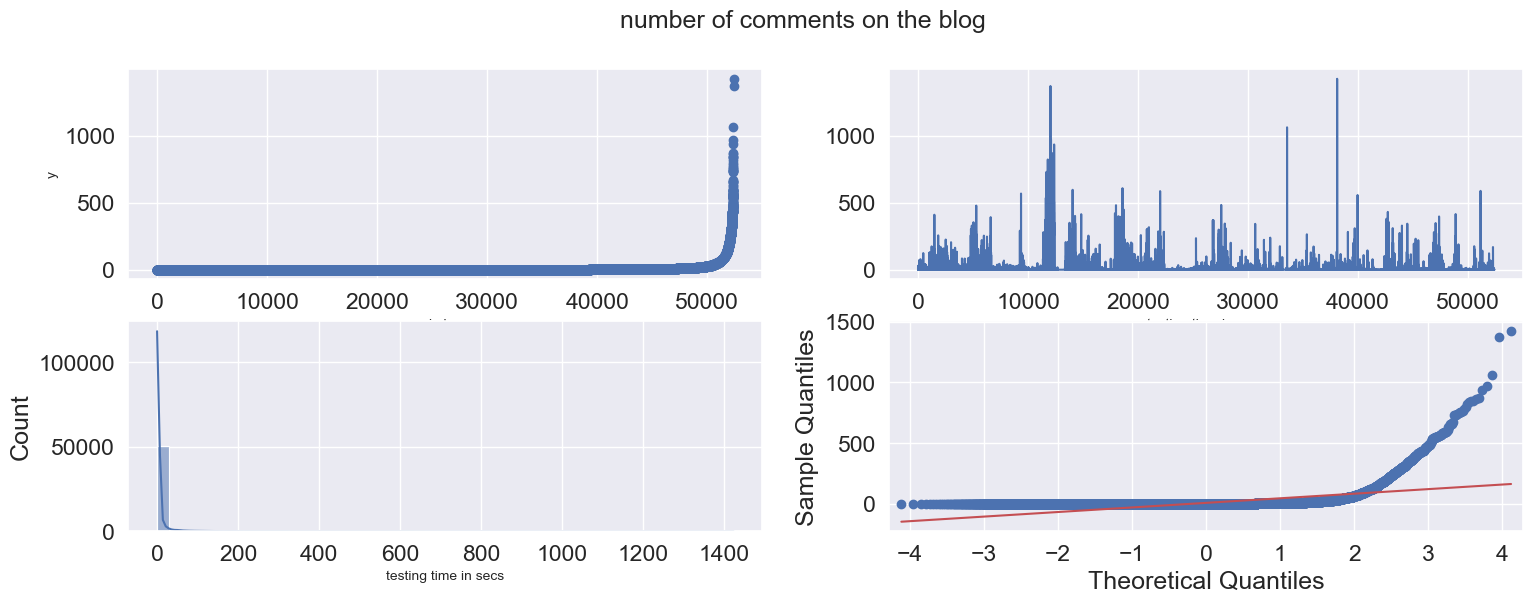

In [206]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(18, 6))

fig.suptitle ('number of comments on the blog', fontsize=18)

ax1.scatter(range(df.shape[0]), np.sort(df.iloc[:, -1].values))
ax1.set_xlabel('index', fontsize=10)
ax1.set_ylabel('y', fontsize=10)

ax2.plot(df.iloc[:, -1]);
ax2.set_xlabel('testing time in secs', fontsize=10)

sns.histplot(df.iloc[:, -1].values, bins=50, kde=True, ax=ax3)
ax3.set_xlabel('testing time in secs', fontsize=10)

# q-q plot
qqplot(df.iloc[:, -1], line='s', ax=ax4);  #  to see whether the distribution of data follow normal distribution.

In [207]:
from scipy.stats import kurtosis

In [208]:
# Calculate the kurtosis
data_kurtosis = kurtosis(df.iloc[:, -1].values)

print("Kurtosis:", data_kurtosis)

Kurtosis: 232.29540940625407


#### type of columns
let us have a look at the data type of all the variables present in the dataset.

In [209]:
dtype_df = df.dtypes.reset_index()
dtype_df.sample(10)

,index,0
206,206,float64
30,30,float64
62,62,float64
160,160,float64
267,267,float64
129,129,float64
184,184,float64
138,138,float64
115,115,float64
164,164,float64


In [210]:
dtype_df.columns = ["Count", "Column Type"]
dtype_df.head(3)

,Count,Column Type
0,0,float64
1,1,float64
2,2,float64


In [211]:
dtype_df.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Count
0,float64,281


In [212]:
# Split the data into features (X) and target (y)
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [213]:
# Create and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [214]:
# Make predictions
y_pred = model.predict(X_test)

In [215]:
# Evaluate the model using RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 32.45823331646596


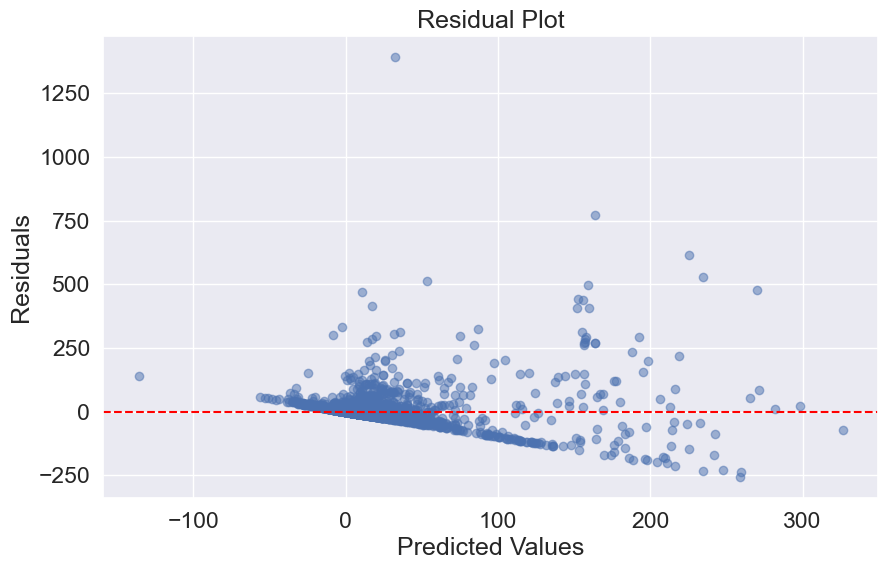

In [216]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Calculate residuals
residuals = y_test - y_pred

# Create a residual plot using matplotlib
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Residual Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

In [217]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print(f"R-squared Score: {r2}")

R-squared Score: 0.2923359234476717


#### try PCA

In [218]:
from sklearn.decomposition import PCA

In [219]:
pca = PCA(n_components=10)

In [220]:
pca.fit(X_train)

PCA(n_components=10)

In [221]:
pca.explained_variance_ratio_

array([0.9496, 0.0467, 0.0014, 0.0009, 0.0005, 0.0004, 0.0002, 0.0001,
       0.0001, 0.0001])

In [222]:
X_train_pca = pca.transform(X_train)

In [223]:
X_test_pca  = pca.transform(X_test)

In [224]:
linreg = LinearRegression()

linreg.fit(X_train_pca, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score

In [227]:
def model_metrics(y_true, y_pred, test='test data'): 
    print("metrics using {} ...".format(test))
    print('Mean Abs Error   MAE    : ', mean_absolute_error(y_true, y_pred))
    print('Mean Sq  Error MSE      : ', mean_squared_error(y_true, y_pred))
    print('Root Mean Sq Error RMSE : ', np.sqrt(mean_squared_error(y_true, y_pred)))
    # print('MAPE                    : ', np.mean(np.abs((y_true - y_pred) / y_true)) * 100)
    # print('MPE                     : ', np.mean((y_true - y_pred) / y_true) * 100)
    print('r2 value                : ', r2_score(y_true, y_pred))

    print('\n')

In [228]:
np.where(y==0)

(array([    1,     2,     5, ..., 52394, 52395, 52396], dtype=int64),)

In [229]:
np.set_printoptions(precision=4, suppress=True)

In [230]:
#np.unique(y)

In [231]:
# predict (training samples)
y_pred = linreg.predict(X_train_pca)
model_metrics(y_train, y_pred, 'training data')

# predict (testing samples)
y_pred = linreg.predict(X_test_pca)
model_metrics(y_test, y_pred, 'test data')

metrics using training data ...
Mean Abs Error   MAE    :  8.299852159570536
Mean Sq  Error MSE      :  915.5559427542797
Root Mean Sq Error RMSE :  30.25815497934862
r2 value                :  0.3483609025169788


metrics using test data ...
Mean Abs Error   MAE    :  8.608956903008972
Mean Sq  Error MSE      :  1083.7844750323309
Root Mean Sq Error RMSE :  32.92088205125025
r2 value                :  0.27201853830970724




In [232]:
# Replace zero values with 0.000001
y_train_zero_inflated = np.where(y_train == 0, 0.000001, y_train)
y_test_zero_inflated  = np.where(y_test  == 0, 0.000001, y_test)

In [233]:
linreg = LinearRegression()

linreg.fit(X_train_pca, y_train_zero_inflated)

LinearRegression()

In [234]:
# predict (training samples)
y_pred = linreg.predict(X_train_pca)
model_metrics(y_train_zero_inflated, y_pred, 'training data')

# predict (testing samples)
y_pred = linreg.predict(X_test_pca)
model_metrics(y_test_zero_inflated, y_pred, 'test data')

metrics using training data ...
Mean Abs Error   MAE    :  8.299852044993212
Mean Sq  Error MSE      :  915.5559395832857
Root Mean Sq Error RMSE :  30.258154926949622
r2 value                :  0.34836090074219483


metrics using test data ...
Mean Abs Error   MAE    :  8.608956795454223
Mean Sq  Error MSE      :  1083.7844713887762
Root Mean Sq Error RMSE :  32.920881995912204
r2 value                :  0.27201853657393515




#### try XGBOOST

In [159]:
import xgboost as xgb

In [235]:
# Create an XGBoost regressor instance
regressor = xgb.XGBRegressor(
    n_estimators  = 100,       # Number of boosting rounds (trees)
    max_depth     = 14,        # Maximum depth of each tree
    learning_rate = 0.075,      # Step size at each iteration
    objective     = 'reg:squarederror',  # Specify regression task
    #random_state  = 42,
    colsample_bytree = .75,
    reg_alpha        = .00001,                 # L1 regularization
    reg_lambda       = 10,
    eval_metric      = 'mae',
    subsample        = .75, 
)

In [238]:
# Train the regressor on the training data
regressor.fit(X_train, y_train_zero_inflated)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.75, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='mae', feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.075, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=14, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [239]:
# predict (training samples)
y_pred = regressor.predict(X_train)
model_metrics(y_train_zero_inflated, y_pred, 'training data')

# predict (testing samples)
y_pred = regressor.predict(X_test)
model_metrics(y_test_zero_inflated, y_pred, 'test data')

metrics using training data ...
Mean Abs Error   MAE    :  1.790778093823328
Mean Sq  Error MSE      :  60.01083957264453
Root Mean Sq Error RMSE :  7.746666352221743
r2 value                :  0.957287798861726


metrics using test data ...
Mean Abs Error   MAE    :  5.072881389580599
Mean Sq  Error MSE      :  676.2984964374838
Root Mean Sq Error RMSE :  26.005739682567842
r2 value                :  0.545728157076725




#### K-Fold with XGBOOST

In [240]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [241]:
# Define the number of folds
num_folds = 5

# Initialize the KFold cross-validation
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

In [242]:
# Initialize a list to store the mean squared errors for each fold
my_train_zero_inflateds = []
mse_scores = []
r2_score   = []

# Create an XGBoost regressor instance
regressor = xgb.XGBRegressor(
    n_estimators  = 100,       # Number of boosting rounds (trees)
    max_depth     = 14,        # Maximum depth of each tree
    learning_rate = 0.075,      # Step size at each iteration
    objective     = 'reg:squarederror',  # Specify regression task
    #random_state  = 42,
    colsample_bytree = .75,
    reg_alpha        = .01,                 # L1 regularization
    reg_lambda       = .01,
    eval_metric      = 'mae',
    subsample        = .75, 
)

# Perform k-fold cross-validation using cross_val_score
num_folds = 5
r2_scores = cross_val_score(regressor, X_train, y_train_zero_inflated, cv=num_folds, scoring='r2')


KeyboardInterrupt



In [169]:
r2_scores

array([0.6117, 0.6004, 0.5094, 0.5648, 0.5904])

#### try lightGBM

In [244]:
#!pip install lightgbm

In [245]:
import lightgbm as lgb

In [246]:
# Create a LightGBM dataset
train_data = lgb.Dataset(X_train, label=y_train_zero_inflated)
test_data  = lgb.Dataset(X_test,  label=y_test_zero_inflated, reference=train_data)

In [249]:
# Define hyperparameters for the LightGBM model
params = {
    'objective': 'regression',  # This specifies that we're solving a regression problem
    'metric': 'rmse',           # Root Mean Squared Error
    'boosting_type': 'gbdt',    # Gradient Boosting Decision Tree
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}

# Train the LightGBM model
num_round = 100
bst = lgb.train(params, train_data, num_round, valid_sets=[test_data])

# Make predictions on the test set
y_pred = bst.predict(X_test, num_iteration=bst.best_iteration)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test_zero_inflated, y_pred))
print(f"RMSE: {rmse}")

print('r2 value                : ', r2_score(y_test_zero_inflated, y_pred))

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.068460 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8352
[LightGBM] [Info] Number of data points in the train set: 41917, number of used features: 219
[LightGBM] [Info] Start training from score 6.790468
RMSE: 26.123450413898805


TypeError: 'list' object is not callable

In [253]:
import sklearn.metrics

In [255]:
sklearn.metrics.r2_score(y_test_zero_inflated, y_pred)

0.5416064755432384